In [384]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from scipy.stats import zscore
import warnings
warnings.filterwarnings("ignore")

In [385]:
data=pd.read_csv('Fraud_loan.csv')
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [386]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               601 non-null object
Married              611 non-null object
Dependents           614 non-null int64
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(2), object(7)
memory usage: 62.4+ KB


In [387]:
data.describe()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,592.000000,600.00000,564.000000
mean,2.869707,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,0.561948,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,0.000000,150.000000,0.000000,9.000000,12.00000,0.000000
25%,3.000000,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3.000000,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,3.000000,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,3.000000,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [388]:
data.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents             int64
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [389]:
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents            0
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

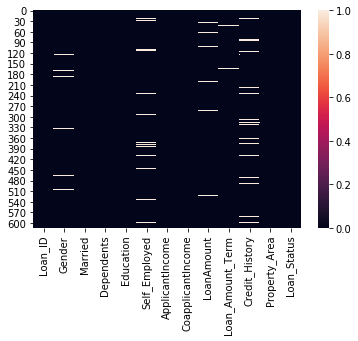

In [390]:
sns.heatmap(data.isnull())

In [391]:
col=["Loan_ID","Gender","Married","Education","Self_Employed","Property_Area","Loan_Status"]
data[col]=data[col].fillna(data.mode().iloc[0])

In [392]:
data.isnull()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,False,False,False,False,False,False,False,False,True,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,False,False,False


In [393]:
col=["Dependents","LoanAmount","Loan_Amount_Term","Credit_History"]
data[col]=data[col].fillna(data.mode().iloc[0])

In [394]:
data.isnull()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,False,False,False


In [395]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data["Loan_ID"]=le.fit_transform(data["Loan_ID"])

In [396]:
data["Gender"]=le.fit_transform(data["Gender"])
data["Married"]=le.fit_transform(data["Married"])
data["Education"]=le.fit_transform(data["Education"])
data["Self_Employed"]=le.fit_transform(data["Self_Employed"])
data["Property_Area"]=le.fit_transform(data["Property_Area"])
data["Loan_Status"]=le.fit_transform(data["Loan_Status"])

In [397]:
data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [398]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,1,0,0,0,0,5849,0.0,120.0,360.0,1.0,2,1
1,1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1


In [399]:
data.corr()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Loan_ID,1.000000,-0.028029,-0.016013,0.320686,0.039442,0.032874,0.016925,0.039211,0.037369,-0.033028,-0.030603,-0.155416,0.011773
Gender,-0.028029,1.000000,0.364569,-0.057030,0.045364,-0.000525,0.058809,0.082912,0.106404,-0.074030,0.009170,-0.025752,0.017987
Married,-0.016013,0.364569,1.000000,0.007602,0.012304,0.004489,0.051708,0.075948,0.146212,-0.100912,0.010938,0.004257,0.091478
Dependents,0.320686,-0.057030,0.007602,1.000000,-0.031887,-0.011221,0.038009,0.009723,0.037563,-0.041776,0.011567,-0.129036,0.062466
Education,0.039442,0.045364,0.012304,-0.031887,1.000000,-0.010383,-0.140760,-0.062290,-0.169436,-0.073928,-0.073658,-0.065243,-0.085884
Self_Employed,0.032874,-0.000525,0.004489,-0.011221,-0.010383,1.000000,0.127180,-0.016100,0.114971,-0.033739,-0.001550,-0.030860,-0.003700
ApplicantIncome,0.016925,0.058809,0.051708,0.038009,-0.140760,0.127180,1.000000,-0.116605,0.564698,-0.046531,-0.018615,-0.009500,-0.004710
CoapplicantIncome,0.039211,0.082912,0.075948,0.009723,-0.062290,-0.016100,-0.116605,1.000000,0.189723,-0.059383,0.011134,0.010522,-0.059187
LoanAmount,0.037369,0.106404,0.146212,0.037563,-0.169436,0.114971,0.564698,0.189723,1.000000,0.037152,-0.000250,-0.047414,-0.031808
Loan_Amount_Term,-0.033028,-0.074030,-0.100912,-0.041776,-0.073928,-0.033739,-0.046531,-0.059383,0.037152,1.000000,-0.004705,-0.076120,-0.022549


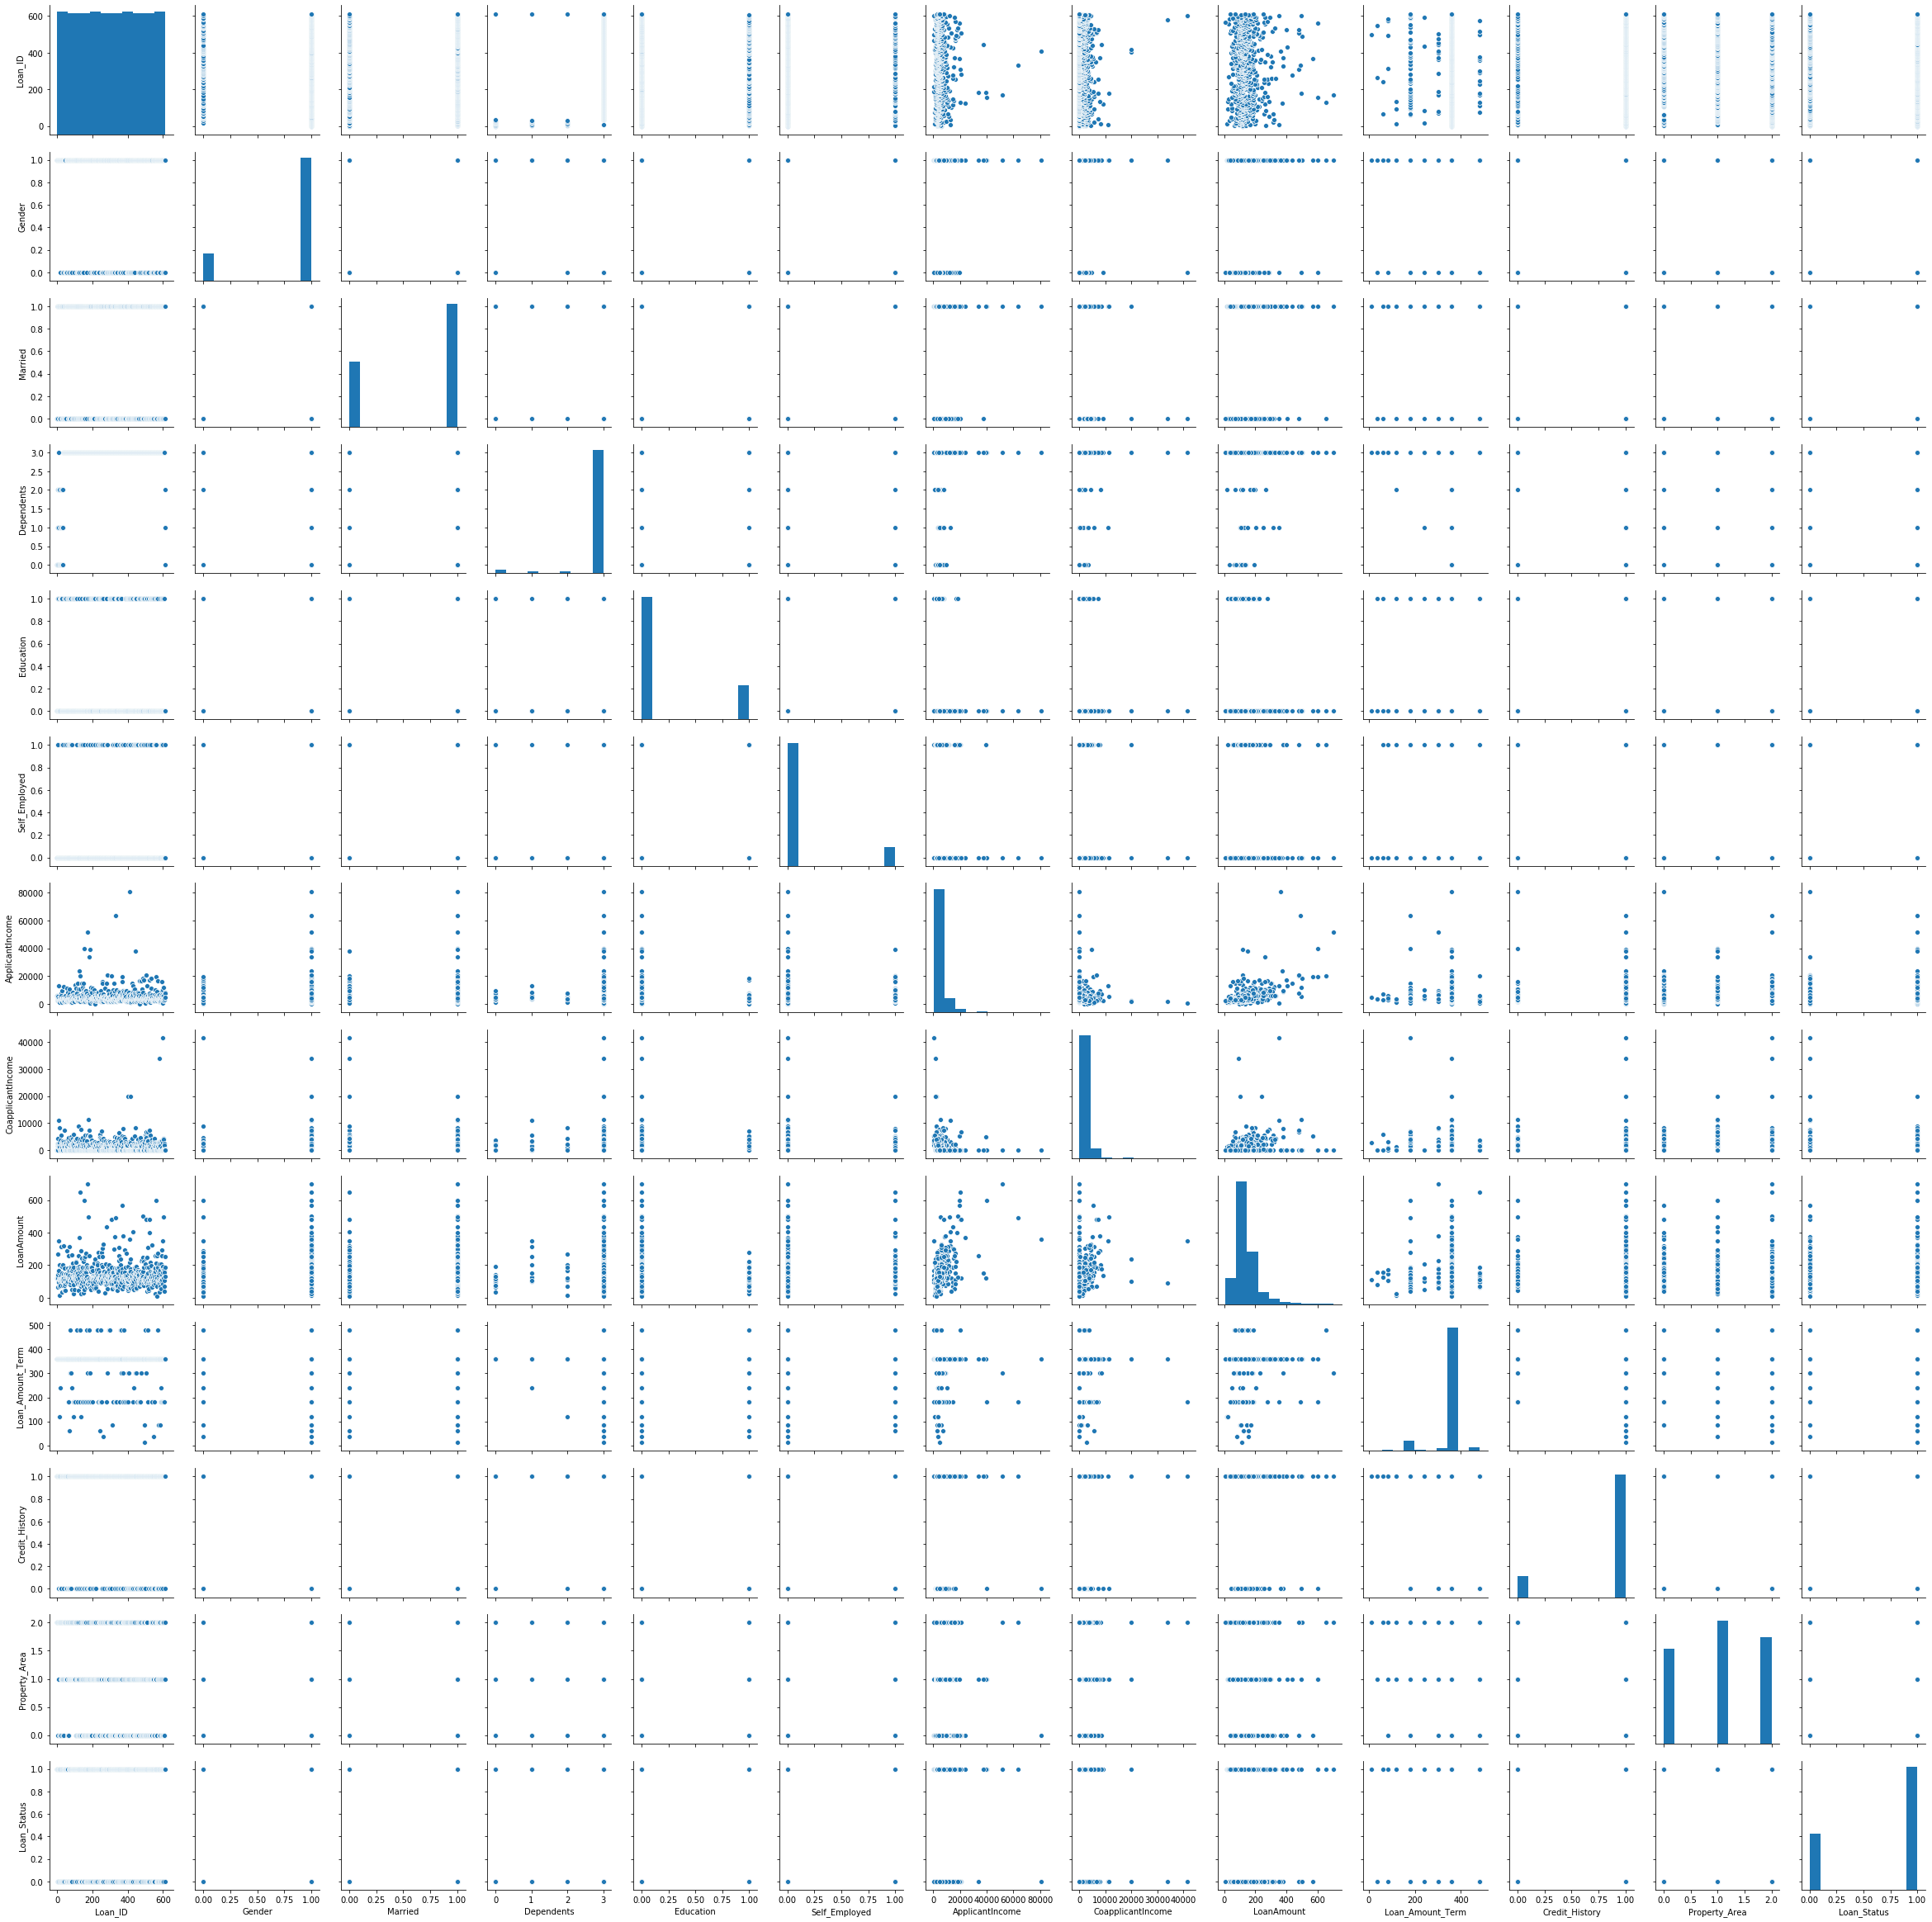

In [400]:
sns.pairplot(data)

In [401]:
#Using MinMaxScaler to shrinks the range
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
data=scaler.fit_transform(data.astype(float))
data

array([[0.        , 1.        , 0.        , ..., 1.        , 1.        ,
        1.        ],
       [0.00163132, 1.        , 1.        , ..., 1.        , 0.        ,
        0.        ],
       [0.00326264, 1.        , 1.        , ..., 1.        , 1.        ,
        1.        ],
       ...,
       [0.99673736, 1.        , 1.        , ..., 1.        , 1.        ,
        1.        ],
       [0.99836868, 1.        , 1.        , ..., 1.        , 1.        ,
        1.        ],
       [1.        , 0.        , 0.        , ..., 0.        , 0.5       ,
        0.        ]])

In [402]:
df=pd.DataFrame(data)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.000000,1.0,0.0,0.000000,0.0,0.0,0.070489,0.000000,0.160637,0.74359,1.0,1.0,1.0
1,0.001631,1.0,1.0,0.333333,0.0,0.0,0.054830,0.036192,0.172214,0.74359,1.0,0.0,0.0
2,0.003263,1.0,1.0,0.000000,0.0,1.0,0.035250,0.000000,0.082489,0.74359,1.0,1.0,1.0
3,0.004894,1.0,1.0,0.000000,1.0,0.0,0.030093,0.056592,0.160637,0.74359,1.0,1.0,1.0
4,0.006525,1.0,0.0,0.000000,0.0,0.0,0.072356,0.000000,0.191027,0.74359,1.0,1.0,1.0


In [403]:
from scipy.stats import zscore
import numpy as np
z=np.abs(zscore(data))
z

array([[1.72923217, 0.47234264, 1.37208932, ..., 0.41173269, 1.22329839,
        0.67451931],
       [1.7235903 , 0.47234264, 0.72881553, ..., 0.41173269, 1.31851281,
        1.48253724],
       [1.71794844, 0.47234264, 0.72881553, ..., 0.41173269, 1.22329839,
        0.67451931],
       ...,
       [1.71794844, 0.47234264, 0.72881553, ..., 0.41173269, 1.22329839,
        0.67451931],
       [1.7235903 , 0.47234264, 0.72881553, ..., 0.41173269, 1.22329839,
        0.67451931],
       [1.72923217, 2.11710719, 1.37208932, ..., 2.42876026, 0.04760721,
        1.48253724]])

In [404]:
threshold=3
print(np.where(z>3))

(array([  0,   1,   2,   3,   4,   6,   9,   9,  13,  14,  15,  16,  17,
        18,  19,  20,  21,  22,  24,  25,  26,  28,  30,  31,  32,  33,
        68,  94, 126, 130, 133, 155, 155, 171, 171, 177, 177, 183, 185,
       242, 262, 278, 308, 313, 333, 333, 369, 402, 409, 417, 432, 443,
       487, 495, 497, 506, 523, 525, 546, 561, 575, 581, 585, 600, 604,
       611, 613], dtype=int64), array([3, 3, 3, 3, 3, 3, 3, 7, 3, 9, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 9, 9, 6, 8, 9, 6, 8, 6, 8, 7, 8, 6, 6, 9, 9, 8, 8, 9,
       6, 8, 8, 7, 6, 7, 8, 6, 8, 9, 9, 8, 8, 8, 9, 8, 9, 7, 9, 7, 8, 3,
       3], dtype=int64))


In [405]:
df_new=df[(z<3).all(axis=1)]
df_new.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
5,0.008157,1.0,1.0,0.666667,0.0,1.0,0.065145,0.100703,0.373372,0.74359,1.0,1.0,1.0
7,0.011419,1.0,1.0,1.000000,0.0,0.0,0.035696,0.060096,0.215630,0.74359,0.0,0.5,0.0
8,0.013051,1.0,1.0,0.666667,0.0,0.0,0.047693,0.036624,0.230101,0.74359,1.0,1.0,1.0
10,0.016313,1.0,1.0,0.666667,0.0,0.0,0.037724,0.016800,0.088278,0.74359,1.0,1.0,1.0
11,0.017945,1.0,1.0,0.666667,0.0,0.0,0.029066,0.044160,0.144718,0.74359,1.0,1.0,1.0


In [406]:
print(df.shape)
print(df_new.shape)

(614, 13)
(552, 13)


In [407]:
x=df_new.drop(12,axis=1)
x.head()

,0,1,2,3,4,5,6,7,8,9,10,11
5,0.008157,1.0,1.0,0.666667,0.0,1.0,0.065145,0.100703,0.373372,0.74359,1.0,1.0
7,0.011419,1.0,1.0,1.000000,0.0,0.0,0.035696,0.060096,0.215630,0.74359,0.0,0.5
8,0.013051,1.0,1.0,0.666667,0.0,0.0,0.047693,0.036624,0.230101,0.74359,1.0,1.0
10,0.016313,1.0,1.0,0.666667,0.0,0.0,0.037724,0.016800,0.088278,0.74359,1.0,1.0
11,0.017945,1.0,1.0,0.666667,0.0,0.0,0.029066,0.044160,0.144718,0.74359,1.0,1.0


In [408]:
y=df_new[12]
y.head()

5     1.0
7     0.0
8     1.0
10    1.0
11    1.0
Name: 12, dtype: float64

In [409]:
print(x.shape)
print(y.shape)

(552, 12)
(552,)


In [410]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import warnings
warnings.filterwarnings("ignore")

In [411]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.21,random_state=14)

In [412]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(436, 12)
(116, 12)
(436,)
(116,)


In [413]:
lg=LogisticRegression()
lg.fit(x_train,y_train)
predlg=lg.predict(x_test)
print(accuracy_score(y_test,predlg))
print(confusion_matrix(y_test,predlg))
print(classification_report(y_test,predlg))

0.8706896551724138
[[18 14]
 [ 1 83]]
              precision    recall  f1-score   support

         0.0       0.95      0.56      0.71        32
         1.0       0.86      0.99      0.92        84

    accuracy                           0.87       116
   macro avg       0.90      0.78      0.81       116
weighted avg       0.88      0.87      0.86       116



In [414]:
mnb=MultinomialNB()
mnb.fit(x_train,y_train)
predmnb=mnb.predict(x_test)
print(accuracy_score(y_test,predmnb))
print(confusion_matrix(y_test,predmnb))
print(classification_report(y_test,predmnb))

0.7327586206896551
[[ 1 31]
 [ 0 84]]
              precision    recall  f1-score   support

         0.0       1.00      0.03      0.06        32
         1.0       0.73      1.00      0.84        84

    accuracy                           0.73       116
   macro avg       0.87      0.52      0.45       116
weighted avg       0.80      0.73      0.63       116



In [415]:
svc=SVC(kernel="rbf")
svc.fit(x_train,y_train)
predsvc=svc.predict(x_test)
print(accuracy_score(y_test,predsvc))
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))

0.8706896551724138
[[18 14]
 [ 1 83]]
              precision    recall  f1-score   support

         0.0       0.95      0.56      0.71        32
         1.0       0.86      0.99      0.92        84

    accuracy                           0.87       116
   macro avg       0.90      0.78      0.81       116
weighted avg       0.88      0.87      0.86       116



In [416]:

dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)
preddtc=dtc.predict(x_test)
print(accuracy_score(y_test,preddtc))
print(confusion_matrix(y_test,preddtc))
print(classification_report(y_test,preddtc))

0.7586206896551724
[[23  9]
 [19 65]]
              precision    recall  f1-score   support

         0.0       0.55      0.72      0.62        32
         1.0       0.88      0.77      0.82        84

    accuracy                           0.76       116
   macro avg       0.71      0.75      0.72       116
weighted avg       0.79      0.76      0.77       116



In [417]:
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)
predknn=knn.predict(x_test)
print(accuracy_score(y_test,predknn))
print(confusion_matrix(y_test,predknn))
print(classification_report(y_test,predknn))

0.8362068965517241
[[17 15]
 [ 4 80]]
              precision    recall  f1-score   support

         0.0       0.81      0.53      0.64        32
         1.0       0.84      0.95      0.89        84

    accuracy                           0.84       116
   macro avg       0.83      0.74      0.77       116
weighted avg       0.83      0.84      0.82       116



In [418]:
from sklearn.ensemble import RandomForestClassifier

rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)
predrfc=rfc.predict(x_test)
print(accuracy_score(y_test,predrfc))
print(confusion_matrix(y_test,predrfc))
print(classification_report(y_test,predrfc))

0.8275862068965517
[[18 14]
 [ 6 78]]
              precision    recall  f1-score   support

         0.0       0.75      0.56      0.64        32
         1.0       0.85      0.93      0.89        84

    accuracy                           0.83       116
   macro avg       0.80      0.75      0.76       116
weighted avg       0.82      0.83      0.82       116



In [419]:
#ROC CURVE
from sklearn.metrics import roc_curve
y_pred_prob=lg.predict_proba(x_test)[:,1]
y_pred_prob

array([0.06685429, 0.86434793, 0.72815126, 0.80585207, 0.86250985,
       0.18486629, 0.8325882 , 0.88920494, 0.82801218, 0.83750955,
       0.83608479, 0.63195417, 0.19314202, 0.72069419, 0.73650119,
       0.85530243, 0.85361267, 0.78310344, 0.1868852 , 0.79597613,
       0.81230473, 0.71597978, 0.75957821, 0.84676246, 0.85271134,
       0.8478458 , 0.76322606, 0.05444669, 0.67433614, 0.86380389,
       0.75485196, 0.16412508, 0.83405377, 0.83033122, 0.74494405,
       0.84481244, 0.74786287, 0.60132548, 0.8091902 , 0.09296184,
       0.88335835, 0.85095715, 0.78627801, 0.8419216 , 0.1224793 ,
       0.19057793, 0.09285166, 0.87783411, 0.84409917, 0.81460054,
       0.6441835 , 0.17342156, 0.82568514, 0.82493997, 0.17798257,
       0.82823878, 0.84904839, 0.20406853, 0.74673758, 0.84128348,
       0.74098492, 0.80998158, 0.85026043, 0.78277107, 0.7611846 ,
       0.77306919, 0.62502094, 0.75799385, 0.68475705, 0.6895005 ,
       0.84738097, 0.75233806, 0.82540816, 0.83813029, 0.18827

In [420]:
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)
print(fpr)
print(tpr)
print(thresholds)

[0.      0.      0.      0.0625  0.0625  0.09375 0.09375 0.125   0.125
 0.15625 0.15625 0.1875  0.1875  0.21875 0.21875 0.25    0.25    0.28125
 0.28125 0.34375 0.34375 0.40625 0.40625 0.4375  0.4375  0.90625 0.90625
 1.     ]
[0.         0.01190476 0.04761905 0.04761905 0.20238095 0.20238095
 0.23809524 0.23809524 0.26190476 0.26190476 0.30952381 0.30952381
 0.36904762 0.36904762 0.48809524 0.48809524 0.52380952 0.52380952
 0.77380952 0.77380952 0.78571429 0.78571429 0.86904762 0.86904762
 0.98809524 0.98809524 1.         1.        ]
[1.88920494 0.88920494 0.87783411 0.86380389 0.84738097 0.84676246
 0.84398932 0.8419216  0.83827845 0.83813029 0.83425128 0.83405377
 0.83033122 0.82823878 0.81460054 0.81230473 0.80901459 0.80585207
 0.74494405 0.74392937 0.74112304 0.73818406 0.71597978 0.70257599
 0.60132548 0.10743175 0.09296184 0.05444669]


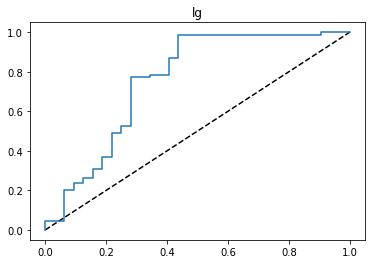

In [421]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label="lg")
plt.title("lg")
plt.show()

In [422]:
from sklearn.metrics import roc_auc_score
auc_score=roc_auc_score(y_test,lg.predict(x_test))
print(auc_score)

0.7752976190476191
